<a href="https://colab.research.google.com/github/Aicoaching2025/OLS-and-Gradient-Descent/blob/main/OLS_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

OLS Mean Squared Error: 0.25222344372394273
Gradient Descent Mean Squared Error: 0.2522234469291768


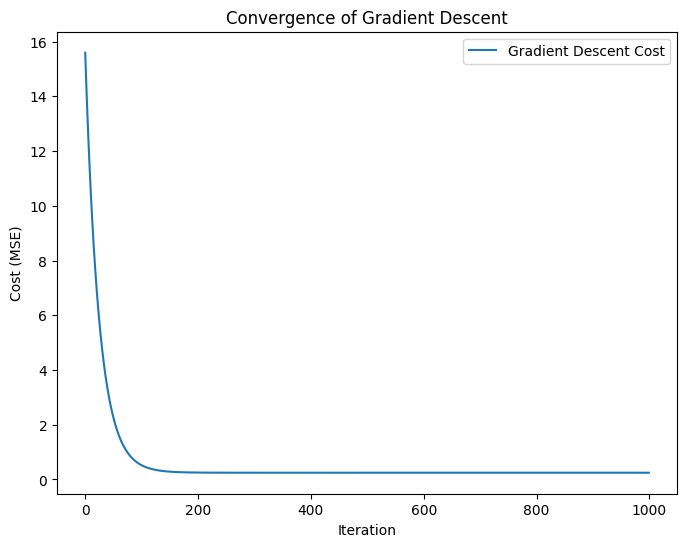

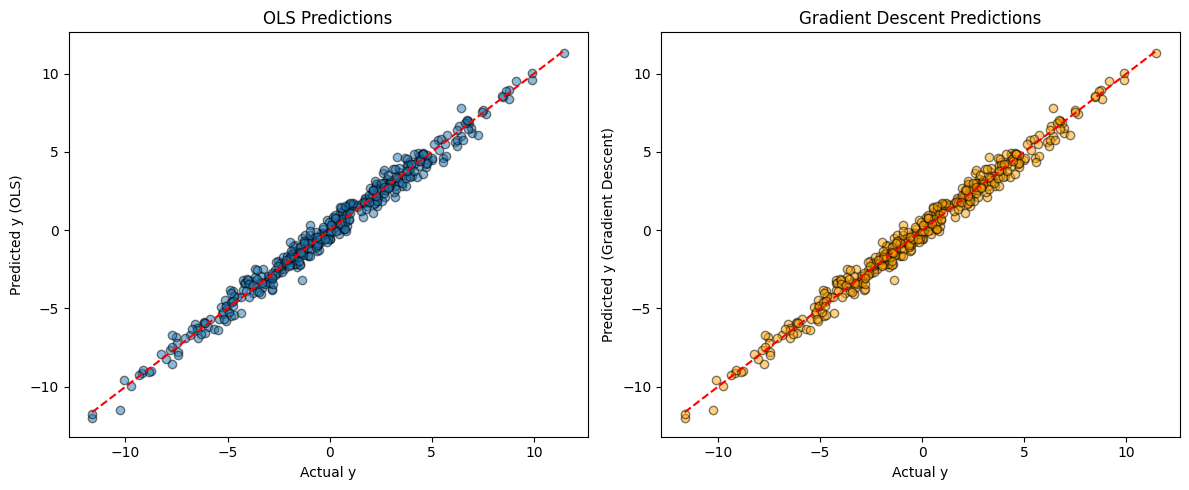

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# ----------------------------
# Step 1: Generate a Synthetic Financial Dataset
# ----------------------------
np.random.seed(42)
n_samples = 2000
n_features = 10

# Generate synthetic features (financial indicators)
X = np.random.randn(n_samples, n_features)

# Define true weights and generate target variable with noise
true_weights = np.random.randn(n_features, 1)
y = X @ true_weights + np.random.randn(n_samples, 1) * 0.5  # noise level of 0.5

# Add an intercept term (column of ones)
X_b = np.hstack([np.ones((n_samples, 1)), X])  # shape: (2000, 11)

# Split the dataset into training and testing sets (80/20 split)
X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=0.2, random_state=42)

# ----------------------------
# Step 2: Ordinary Least Squares (OLS) - Closed-Form Solution
# ----------------------------
def ols_closed_form(X, y):
    """
    Compute weights using the closed-form solution for linear regression.
    """
    return np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)

w_ols = ols_closed_form(X_train, y_train)

# Generate predictions and calculate performance metrics for OLS
y_pred_ols = X_test.dot(w_ols)
mse_ols = mean_squared_error(y_test, y_pred_ols)
print("OLS Mean Squared Error:", mse_ols)

# ----------------------------
# Step 3: Gradient Descent Implementation
# ----------------------------
def gradient_descent(X, y, learning_rate=0.01, n_iterations=1000):
    """
    Perform gradient descent to minimize the MSE cost function.
    """
    m, n = X.shape
    w = np.zeros((n, 1))  # Initialize weights with zeros
    cost_history = []

    for i in range(n_iterations):
        predictions = X.dot(w)
        errors = predictions - y
        gradients = (2/m) * X.T.dot(errors)
        w = w - learning_rate * gradients
        cost = (errors**2).mean()
        cost_history.append(cost)

    return w, cost_history

# Run gradient descent on the training data
w_gd, cost_history = gradient_descent(X_train, y_train, learning_rate=0.01, n_iterations=1000)

# Generate predictions and calculate performance metrics for Gradient Descent
y_pred_gd = X_test.dot(w_gd)
mse_gd = mean_squared_error(y_test, y_pred_gd)
print("Gradient Descent Mean Squared Error:", mse_gd)

# ----------------------------
# Step 4: Visualize Convergence and Predictions
# ----------------------------

# Plot cost function history for Gradient Descent
plt.figure(figsize=(8, 6))
plt.plot(range(1000), cost_history, label='Gradient Descent Cost')
plt.xlabel('Iteration')
plt.ylabel('Cost (MSE)')
plt.title('Convergence of Gradient Descent')
plt.legend()
plt.show()

# Compare OLS and Gradient Descent predictions
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_ols, alpha=0.5, edgecolor='k')
plt.xlabel('Actual y')
plt.ylabel('Predicted y (OLS)')
plt.title('OLS Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_gd, alpha=0.5, edgecolor='k', color='orange')
plt.xlabel('Actual y')
plt.ylabel('Predicted y (Gradient Descent)')
plt.title('Gradient Descent Predictions')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')

plt.tight_layout()
plt.show()
